In [480]:
# libraries

import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from stop_words import get_stop_words
from collections import Counter
import math

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## Training

In [288]:
# reading tsv file

tsv_file = open("film-genres-train.tsv", encoding='utf-8')
read_tsv = csv.reader(tsv_file, delimiter="\t")

In [289]:
# enhancing the list of stopwords

stop_words = list(get_stop_words('en'))  
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

In [290]:
# removing stopwords and tokenizing

data = []

for row in read_tsv:
    
    desc = row[1]
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    text_tokens = tokenizer.tokenize(desc)
    
    tokens_without_sw = [word for word in text_tokens if word.lower() not in stop_words]  # if word.lower() condition to remove words like 'An/an', 'The/the'
    
    row[1] = tokens_without_sw
    
    data.append(row)

In [291]:
# counting occurences of genres

total_horror_genre, total_comedy_genre, total_drama_genre, total_doc_genre, total_western_genre = 0,0,0,0,0

for i in data:
    if i[0] == 'Horror':
        total_horror_genre += 1
    if i[0] == 'Drama':
        total_drama_genre += 1
    if i[0] == 'Comedy':
        total_comedy_genre += 1
    if i[0] == 'Documentary':
        total_doc_genre += 1
    if i[0] == 'Western':
        total_western_genre += 1

In [292]:
# probs of genres occuring in the dataset

total_rows = total_horror_genre+total_comedy_genre+total_drama_genre+total_western_genre+total_doc_genre

total_horror_genre = total_horror_genre/total_rows
total_comedy_genre = total_comedy_genre/total_rows
total_drama_genre = total_drama_genre/total_rows
total_doc_genre = total_doc_genre/total_rows
total_western_genre = total_western_genre/total_rows

In [297]:
total_horror_genre, total_comedy_genre, total_drama_genre, total_western_genre, total_doc_genre

(0.053237939923194276,
 0.24404229575464254,
 0.4858751117891525,
 0.05686779946341207,
 0.1599768530695986)

In [294]:
# putting all the words of each genre in one place

all_horror, all_comedy, all_drama, all_western, all_doc = [],[],[],[],[]

for i in all_terms_horror:
    for j in i:
        all_horror.append(j)
        
for i in all_terms_comedy:
    for j in i:
        all_comedy.append(j)
        
for i in all_terms_western:
    for j in i:
        all_western.append(j)
        
for i in all_terms_drama:
    for j in i:
        all_drama.append(j)
        
for i in all_terms_doc:
    for j in i:
        all_doc.append(j)

In [284]:
# counting occurrences of each term in each genre

cnt_horror = Counter()
cnt_comedy = Counter()
cnt_drama = Counter()
cnt_doc = Counter()
cnt_western = Counter()

for word in all_horror:
    cnt_horror[word] += 1
    
for word in all_comedy:
    cnt_comedy[word] += 1
    
for word in all_drama:
    cnt_drama[word] += 1
    
for word in all_doc:
    cnt_doc[word] += 1
    
for word in all_western:
    cnt_western[word] += 1


In [286]:
# calculating probs of each term in each genre

dic_horror, dic_comedy, dic_western, dic_doc, dic_drama = {},{},{},{},{}

for i in all_horror:
    dic_horror[i] = cnt_horror[i]/len(cnt_horror)
    
for i in all_comedy:
    dic_comedy[i] = cnt_comedy[i]/len(cnt_comedy)
    
for i in all_western:
    dic_western[i] = cnt_western[i]/len(cnt_western)
    
for i in all_doc:
    dic_doc[i] = cnt_doc[i]/len(cnt_doc)
    
for i in all_drama:
    dic_drama[i] = cnt_drama[i]/len(cnt_drama)

In [287]:
dic_horror['night'], dic_comedy['night'], dic_drama['night'], dic_doc['night'], dic_western['night']

(0.013026149509089141,
 0.007989070713670518,
 0.013307693988593406,
 0.002160974918520618,
 0.0022414671421293938)

## Testing

In [492]:
# reading tsv test file

tsv_file_test = open("film-genres-test.tsv", encoding='utf-8')
read_tsv_test = csv.reader(tsv_file_test, delimiter="\t")

In [493]:
# removing stopwords and tokenizing

data_test = []

for row in read_tsv_test:
    
    desc = row[1]
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    text_tokens = tokenizer.tokenize(desc)
    
    tokens_without_sw = [word for word in text_tokens if word.lower() not in stop_words]  # if word.lower() condition to remove words like 'An/an', 'The/the'
    
    row[1] = tokens_without_sw
    
    data_test.append(row)

In [519]:
# counting occurences of genres

total_horror_genre_test, total_comedy_genre_test, total_drama_genre_test, total_doc_genre_test, total_western_genre_test = 0,0,0,0,0

for i in data_test:
    if i[0] == 'Horror':
        total_horror_genre_test += 1
    if i[0] == 'Drama':
        total_drama_genre_test += 1
    if i[0] == 'Comedy':
        total_comedy_genre_test += 1
    if i[0] == 'Documentary':
        total_doc_genre_test += 1
    if i[0] == 'Western':
        total_western_genre_test += 1

In [540]:
total_horror_genre_test

267

In [494]:
# calculating probs of every row in Horror

dic_test_horror = {}
c = 0
prob = 0

for row in data_test:
    for term in row[1]:
        
        if term in dic_horror:
            if prob == 0:
                prob = dic_horror[term]
            else:
                prob *= dic_horror[term]

        else:
            if prob == 0:
                prob = 1  # considering prob of absent terms as 1
#                 prob = (0+0.1)/(len(cnt_horror)+0.1)  # not calculating log(2) because it gives negative values 

            else:
                prob *= 1
#                 prob *= (0+0.1)/(len(cnt_horror)+0.1)  # not calculating log(2) because it gives negative values 
        
    prob * total_horror_genre
    
    dic_test_horror[c] = prob
    c += 1

In [495]:
# print(dic_test_horror)

In [496]:
# calculating probs of every row in Comedy

dic_test_comedy = {}
c = 0
prob = 0

for row in data_test:

    for term in row[1]:
        
        if term in dic_comedy:
            if prob == 0:
                prob = dic_comedy[term]
            else:
                prob *= dic_comedy[term]
        else:
            if prob == 0:
                prob = 1  # considering prob of absent terms as 1
#                 prob = (0+0.1)/(len(cnt_comedy)+0.1)  # not calculating log(2) because it gives negative values 
                
            else:
                prob *= 1
#                 prob *= (0+0.1)/(len(cnt_comedy)+0.1)  # not calculating log(2) because it gives negative values 
        
    prob * total_comedy_genre
    
    dic_test_comedy[c] = prob
    c += 1

In [497]:
# calculating probs of every row in Drama

dic_test_drama = {}
c = 0
prob = 0

for row in data_test:

    for term in row[1]:
        
        if term in dic_drama:
            if prob == 0:
                prob = dic_drama[term]
            else:
                prob *= dic_drama[term]
        else:
            if prob == 0:
                prob = 1 # considering prob of absent terms as 1
#                 prob = (0+0.1)/(len(cnt_drama)+0.1)  # not calculating log(2) because it gives negative values 
                
            else:
                prob *= 1
#                 prob *= (0+0.1)/(len(cnt_drama)+0.1)  # not calculating log(2) because it gives negative values 
        
    prob * total_drama_genre
    
    dic_test_drama[c] = prob
    c += 1

In [498]:
# calculating probs of every row in Documentary

dic_test_doc = {}
c = 0
prob = 0

for row in data_test:
    
    for term in row[1]:        
        if term in dic_doc:
            if prob == 0:
                prob = dic_doc[term]
            else:
                prob *= dic_doc[term]
        else:
            if prob == 0:
                prob = 1  # considering prob of absent terms as 1
#                 prob = (0+0.1)/(len(cnt_doc)+0.1)  # not calculating log(2) because it gives negative values 
                
            else:
                prob *= 1
#                 prob *= (0+0.1)/(len(cnt_doc)+0.1)  # not calculating log(2) because it gives negative values 
        
    prob * total_doc_genre
    
    dic_test_doc[c] = prob
    
    c += 1

In [500]:
# calculating probs of every row in Western

dic_test_western = {}
c = 0
prob = 0

for row in data_test:
    
    for term in row[1]:
        
        if term in dic_western:
            if prob == 0:
                prob = dic_western[term]
            else:
                prob *= dic_western[term]
        else:
            if prob == 0:
                prob = 1  # considering prob of absent terms as 1
#                 prob = (0+0.1)/(len(cnt_western)+0.1)  # not calculating log(2) because it gives negative values 
                
            else:
#                 prob *= (0+0.1)/(len(cnt_western)+0.1)  # not calculating log(2) because it gives negative values 
                prob *= 1
        
    prob * total_western_genre
    
    dic_test_western[c] = prob
    c += 1

In [501]:
# Finding max prob of each row and predicting label

dic_chk_label = {}

for i in range(len(dic_test_horror)):
    val = max(dic_test_horror[i],dic_test_comedy[i],dic_test_drama[i],dic_test_doc[i],dic_test_western[i])
    if val == dic_test_horror[i]:
        label = 'Horror'
        dic_chk_label[i] = label
    elif val == dic_test_comedy[i]:
        label = 'Comedy'
        dic_chk_label[i] = label
    if val == dic_test_drama[i]:
        label = 'Drama'
        dic_chk_label[i] = label
    if val == dic_test_doc[i]:
        label = 'Documentary'
        dic_chk_label[i] = label
    if val == dic_test_western[i]:
        label = 'Western'
        dic_chk_label[i] = label

## Results

In [588]:
count_yes, count_no, count_horror, count_comedy, count_drama, count_western, count_doc = 0,0,0,0,0,0,0
exp_horror, pred_horror, exp_comedy, pred_comedy, exp_drama, pred_drama = [],[],[],[],[],[]
exp_doc, pred_doc, exp_western, pred_western = [],[],[],[]
exp,pred = [],[]

for i in range(len(data_test)):
        
    exp.append(data_test[i][0])
    pred.append(dic_chk_label[i])
    
    if data_test[i][0] == dic_chk_label[i]:
        
        count_yes+=1
        
        if data_test[i][0] == 'Horror':
            exp_horror.append(data_test[i][0])
            pred_horror.append(dic_chk_label[i])
            count_horror+=1
            
        if data_test[i][0] == 'Comedy':
            exp_comedy.append(data_test[i][0])
            pred_comedy.append(dic_chk_label[i])
            count_comedy+=1
            
        if data_test[i][0] == 'Drama':
            exp_drama.append(data_test[i][0])
            pred_drama.append(dic_chk_label[i])
            count_drama+=1
            
        if data_test[i][0] == 'Western':
            exp_western.append(data_test[i][0])
            pred_western.append(dic_chk_label[i])
            count_western+=1
            
        if data_test[i][0] == 'Documentary':
            exp_doc.append(data_test[i][0])
            pred_doc.append(dic_chk_label[i])
            count_doc+=1
            
    else:
        count_no += 1


In [589]:
print('Correct horror predictions = ', count_horror, ' out of ',total_horror_genre_test)
print('Correct comedy predictions = ',count_comedy, ' out of ',total_comedy_genre_test)
print('Correct drama predictions = ',count_drama, ' out of ',total_drama_genre_test)
print('Correct documentary predictions = ',count_doc, ' out of ',total_doc_genre_test)
print('Correct western predictions = ',count_western, ' out of ',total_western_genre_test)

Correct horror predictions =  56  out of  267
Correct comedy predictions =  278  out of  1207
Correct drama predictions =  456  out of  2348
Correct documentary predictions =  110  out of  691
Correct western predictions =  54  out of  239


In [590]:
print('Overall correctly predicted: ',count_yes, 'Overall not correctly predicted: ',count_no)

# EVEN IF I USE EPSILON IT GIVES THE SAME RESULTS

Overall correctly predicted:  954 Overall not correctly predicted:  3798


In [591]:
cm_h = confusion_matrix(exp_horror, pred_horror)
cm_c = confusion_matrix(exp_comedy, pred_comedy)
cm_doc = confusion_matrix(exp_doc, pred_doc)
cm_drama = confusion_matrix(exp_drama, pred_drama)
cm_w = confusion_matrix(exp_western, pred_western)

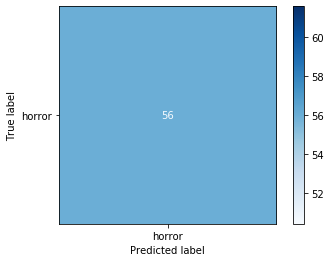

<Figure size 432x288 with 0 Axes>

In [592]:
labels = ['horror'] 

disp = ConfusionMatrixDisplay(confusion_matrix=cm_h, display_labels=labels) 

disp.plot(cmap=plt.cm.Blues) 

fig1 = plt.gcf()
plt.show()
plt.draw()

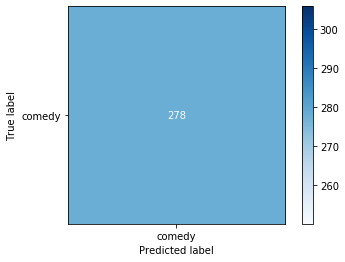

<Figure size 432x288 with 0 Axes>

In [593]:
labels = ['comedy'] 

disp = ConfusionMatrixDisplay(confusion_matrix=cm_c, display_labels=labels) 

disp.plot(cmap=plt.cm.Blues) 

fig1 = plt.gcf()
plt.show()
plt.draw()

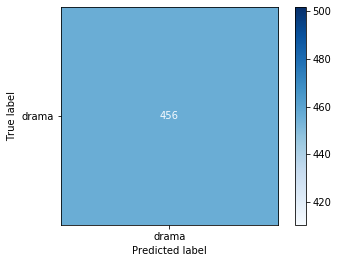

<Figure size 432x288 with 0 Axes>

In [594]:
labels = ['drama'] 

disp = ConfusionMatrixDisplay(confusion_matrix=cm_drama, display_labels=labels) 

disp.plot(cmap=plt.cm.Blues) 

fig1 = plt.gcf()
plt.show()
plt.draw()

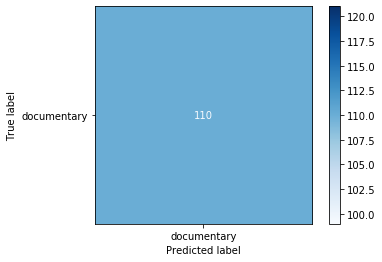

<Figure size 432x288 with 0 Axes>

In [595]:
labels = ['documentary'] 

disp = ConfusionMatrixDisplay(confusion_matrix=cm_doc, display_labels=labels) 

disp.plot(cmap=plt.cm.Blues) 

fig1 = plt.gcf()
plt.show()
plt.draw()

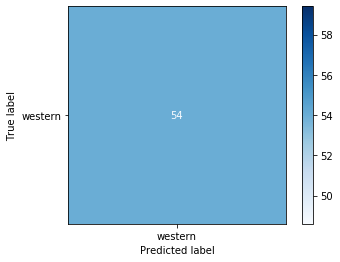

<Figure size 432x288 with 0 Axes>

In [596]:
labels = ['western'] 

disp = ConfusionMatrixDisplay(confusion_matrix=cm_w, display_labels=labels) 

disp.plot(cmap=plt.cm.Blues) 

fig1 = plt.gcf()
plt.show()
plt.draw()

In [598]:
print('Precision: ',precision_score(exp, pred, average="macro"))
print('Recall: ',recall_score(exp, pred, average="macro"))
print('Accuracy: ',accuracy_score(exp, pred))

Precision:  0.2041396049658674
Recall:  0.20387995644919873
Accuracy:  0.20075757575757575
